In [1]:
from skimage.io import imread
from skimage import img_as_float
import pylab
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [3]:
image = imread('/root/Documents/ML/1.jpg')
img = img_as_float(image)

In [5]:
image.shape

(366, 550, 3)

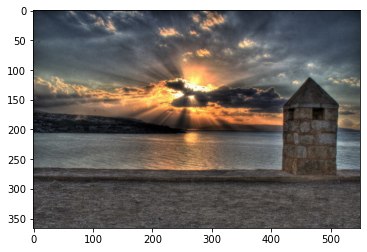

In [6]:
pylab.imshow(image)

In [7]:
def make_new_img(img, n_clusters=8, clst=None):
    pixels = img.reshape(img.shape[0]*img.shape[1], 3)
    
    clst = clst or MiniBatchKMeans(random_state=241, n_clusters=n_clusters)
    clst.fit(pixels)
    
    pixels_classes = clst.predict(pixels)
    pixel_class_to_mean_pixel = {}
    for cl in set(pixels_classes):
        t = pixels[pixels_classes==cl]
        pixel_class_to_mean_pixel[cl] = t.mean(axis=0)
    new_pixels_mean = np.array([pixel_class_to_mean_pixel[cl] for cl in pixels_classes])
    
    new_image_mean = new_pixels_mean.reshape(img.shape[0], img.shape[1], 3)
    pylab.imshow(new_image_mean)

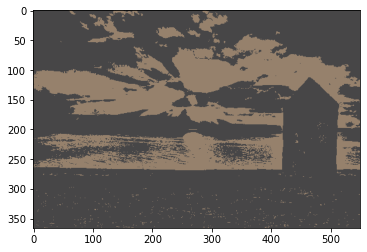

In [8]:
make_new_img(img, 2)

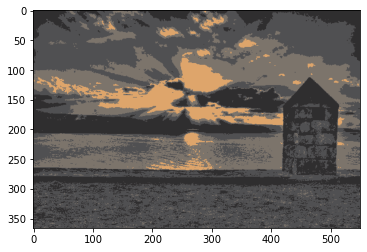

In [9]:
make_new_img(img, 4)

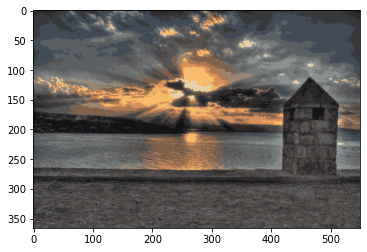

In [12]:
make_new_img(img, 16)

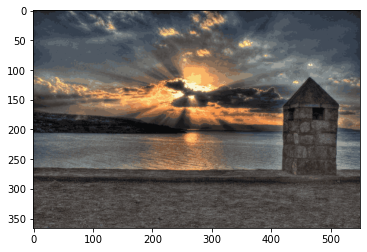

In [13]:
make_new_img(img, 32)

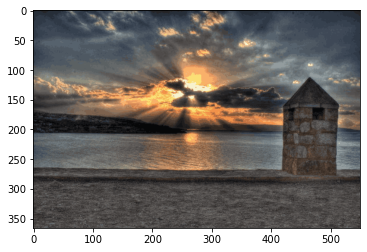

In [17]:
make_new_img(img, 64)